C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_32428\898011147.py:27: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = X.select_dtypes(include=[np.object]).columns


Accuracy for Bipolar Disorder Prediction: 0.53


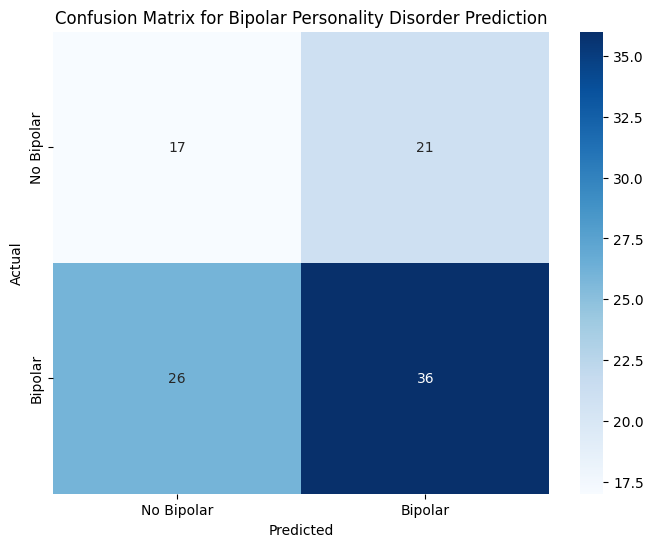

Accuracy for Schizophrenia Prediction: 0.43


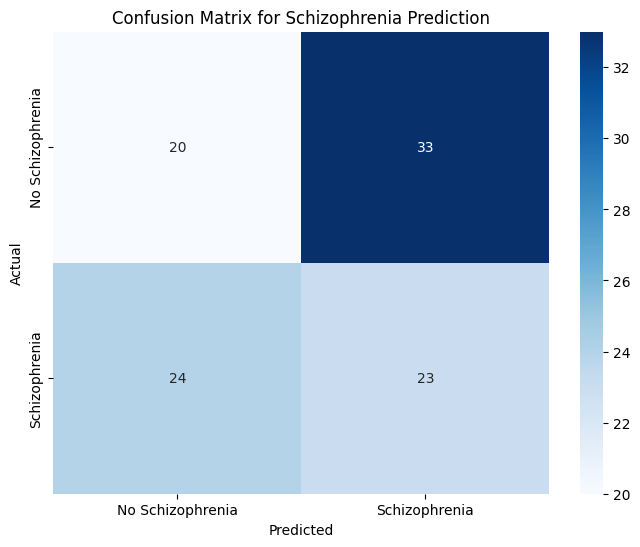

KeyError: "None of [Index(['Age', 'Blood Pressure', 'Weight', 'Height', 'Hallucinations',\n       'Manic Episodes', 'Delusions', 'Depression', 'Disorganized Thinking',\n       'Elevated Mood'],\n      dtype='object')] are in the [columns]"

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('mental_health_symptoms_data.csv')

# Replace 'None' with NaN
df.replace('None', np.nan, inplace=True)

# Extract features and target variables
X = df.drop(['Patient Name', 'Bipolar Disorder', 'Schizophrenia'], axis=1)
y_bipolar = df['Bipolar Disorder']
y_schizophrenia = df['Schizophrenia']

# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(include=[np.object]).columns

# Create transformers for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train_bipolar, y_test_bipolar, y_train_schizophrenia, y_test_schizophrenia = \
    train_test_split(X, y_bipolar, y_schizophrenia, test_size=0.2, random_state=42)

# Build and train the Random Forest model for Bipolar Disorder prediction
rf_bipolar = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_bipolar.fit(X_train, y_train_bipolar)

# Predictions for Bipolar Disorder
y_pred_bipolar = rf_bipolar.predict(X_test)
accuracy_bipolar = accuracy_score(y_test_bipolar, y_pred_bipolar)
print(f'Accuracy for Bipolar Disorder Prediction: {accuracy_bipolar}')

# Confusion matrix for Bipolar Disorder prediction
plt.figure(figsize=(8, 6))
cm_bipolar = confusion_matrix(y_test_bipolar, y_pred_bipolar)
sns.heatmap(cm_bipolar, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bipolar', 'Bipolar'], yticklabels=['No Bipolar', 'Bipolar'])
plt.title('Confusion Matrix for Bipolar Personality Disorder Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Build and train the Random Forest model for Schizophrenia prediction
rf_schizophrenia = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_schizophrenia.fit(X_train, y_train_schizophrenia)

# Predictions for Schizophrenia
y_pred_schizophrenia = rf_schizophrenia.predict(X_test)
accuracy_schizophrenia = accuracy_score(y_test_schizophrenia, y_pred_schizophrenia)
print(f'Accuracy for Schizophrenia Prediction: {accuracy_schizophrenia}')

# Confusion matrix for Schizophrenia prediction
plt.figure(figsize=(8, 6))
cm_schizophrenia = confusion_matrix(y_test_schizophrenia, y_pred_schizophrenia)
sns.heatmap(cm_schizophrenia, annot=True, fmt='d', cmap='Blues', xticklabels=['No Schizophrenia', 'Schizophrenia'], yticklabels=['No Schizophrenia', 'Schizophrenia'])
plt.title('Confusion Matrix for Schizophrenia Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Features representing Ways to Avoid Bipolar Disorder and Schizophrenia
X_avoidance_features = pd.DataFrame({
    'Maintain_Healthy_Lifestyle': [1],
    'Seek_Professional_Help': [1],
    'Build_Strong_Support_System': [1],
    'Monitor_Manage_Mental_Health': [1],
    'Avoid_Substance_Abuse': [1],
    'Stay_Informed': [1]
})

# Prediction for Avoidance of Bipolar Disorder
prediction_avoid_bipolar = rf_bipolar.predict(X_avoidance_features)
print(f'Prediction for Avoidance of Bipolar Disorder: {prediction_avoid_bipolar}')

# Prediction for Avoidance of Schizophrenia
prediction_avoid_schizophrenia = rf_schizophrenia.predict(X_avoidance_features)
print(f'Prediction for Avoidance of Schizophrenia: {prediction_avoid_schizophrenia}')
